In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import eval_tools as eval

In [2]:
# load data
exp_df = pd.read_csv('results/experiment_results_exp-3.csv')

In [ ]:
# compute accuracy and recall for each doas estimated by each method within a threshold of 10 degrees

def calc_ae(a,b):
    x = np.abs(a-b)
    return np.min(np.array((x, np.abs(360-x))), axis=0)

exp_df['ang_error'] = calc_ae(
    np.rad2deg(exp_df['doas_est_az']), 
    np.rad2deg(exp_df['doas_ref_az'])
)

ang_error_threshold_choices = [5, 10, 15, 20]

# compute accuracy and recall based on the frame id as in DCASE Task 3
unique_frame_ids = exp_df['frame_id'].unique()
unique_method_ids = exp_df['method_id'].unique()

df_thresholds = pd.DataFrame()

for frame_id in tqdm(unique_frame_ids, desc='frame'):
    df_frame = exp_df[exp_df['frame_id'] == frame_id]
    
    for method_id in unique_method_ids:
        df_method = df_frame[df_frame['method_id'] == method_id]    
                
        assert len(df_method) == np.unique(df_method['doas_est_az']).shape[0] == np.unique(df_method['n_sources'])
            
        # accuracy and mean error
        for thr in ang_error_threshold_choices:
            
            accuracy = np.sum(df_method['ang_error'] <= thr) / len(df_method)
            error = np.mean(df_method[df_method['ang_error'] <= thr]['ang_error'])

            df_ = pd.DataFrame({
                "frame_id": frame_id,
                "method_id": method_id,
                "accuracy": accuracy,
                "mean_error": error,
                "threshold": thr
            }, index=[0])
            df_thresholds = pd.concat([df_thresholds, df_], ignore_index=True)

frame:   0%|          | 0/150 [00:00<?, ?it/s]

> /var/folders/6j/jjy0khhn7n57n5dmw92shzg80000gn/T/ipykernel_38520/571966187.py(33)<module>()
     32 
---> 33             accuracy = np.sum(df_method['ang_error'] <= thr) / len(df_method)
     34             error = np.mean(df_method[df_method['ang_error'] <= thr]['ang_error'])

1
0    True
Name: ang_error, dtype: bool
0    0.0
Name: ang_error, dtype: float64
                                            exp_name             time  \
0  exp-3_nSrc-1_doas-[44]_type-speech-duration-0....  20250306-112209   

  record_id  num_srcs  src_ids  doas_est_idx  doas_ref_idx  doas_ref_az  \
0        s0         1        0            44            44     4.607669   

   doas_est_az  doas_ref_el  ...  mc_seed  \
0     4.607669     1.570796  ...        0   

                                           method_id loc_method freq_min  \
0  music_freqs-[200, 4000]_ref_nObs-8_seed-13_nor...      music      200   

   freq_max  sv_method  nObs seed  sv_normalization  ang_error  
0      4000        ref     8  

frame:   0%|          | 0/150 [00:50<?, ?it/s]


In [5]:
df_merge = exp_df.merge(df_thresholds, on=['frame_id', 'method_id'])

In [63]:
print('accuracy for 5 degree, the higher the better')
df_pivot = df_merge[
        (df_merge['seed'] == 13)
        & (df_merge['threshold'] == 10)
        & (df_merge['duration'] == 0.5)
].pivot_table(
        values='accuracy', 
        columns=['n_sources'],
        index=['sv_method', 'nObs', 'seed', 'loc_method'], 
        aggfunc='mean'
)
df_pivot.style.background_gradient(cmap='viridis', axis=1)

accuracy for 5 degree, the higher the better


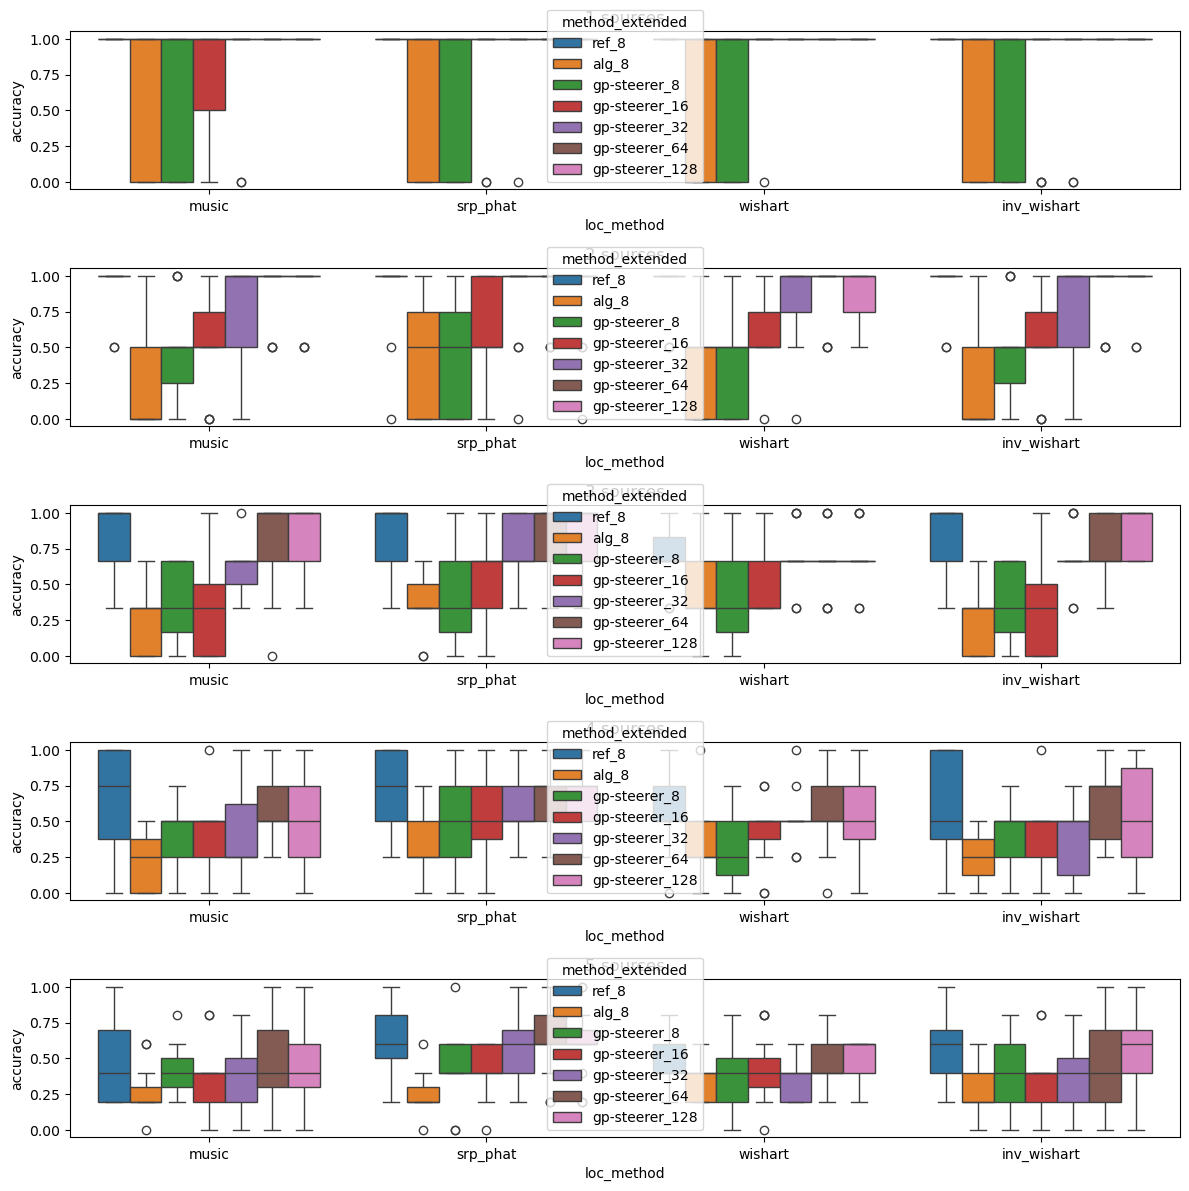

In [ ]:
n_max_sources = np.max(df_merge['n_sources'])
loc_methods = np.unique(df_merge['loc_method'])
sv_methods = np.unique(df_merge['sv_method'])

fig, axarr = plt.subplots(n_max_sources, 1, figsize=(12, 12))


for i, n_sources in enumerate(range(n_max_sources)):
    # for j, loc_method in enumerate(loc_methods):

        df_ = df_merge[
            (df_merge['seed'] == 13)
            & (df_merge['threshold'] == 10)
            & (df_merge['n_sources'] == n_sources+1)
            & (df_merge['record_id'] == 's0')
            & (df_merge['duration'] == 0.5)
        ]
        
        df_ = df_.assign(method_extended=df_['sv_method'] + '_' + df_['nObs'].astype(str))
    
        sns.boxplot(
            data=df_,
            x='loc_method',
            y='accuracy',
            # y='mean_error',
            hue='method_extended',
            ax=axarr[i],
        )
        axarr[i].set_title(f'{n_sources+1} sources')
plt.tight_layout()

In [70]:
df_ = df_merge[
        (df_merge['seed'] == 13)
        & (df_merge['n_sources'] == 3)
        & (df_merge['record_id'] == 's0')
        & (df_merge['duration'] == 0.5)
        & (df_merge['loc_method'] == 'srp_phat')
        & (df_merge['sv_method'] == 'alg')
    ]
print(len(df_))
df_

60


,exp_name,time,record_id,num_srcs,src_ids,doas_est_idx,doas_ref_idx,doas_ref_az,doas_est_az,doas_ref_el,...,freq_min,freq_max,sv_method,nObs,seed,sv_normalization,ang_error,accuracy,mean_error,threshold
24696,exp-3_nSrc-3_doas-[44 47 53]_type-speech-durat...,20250306-112614,s0,3,0,32,44,4.607669,3.351032,1.570796,...,200,4000,alg,8,13,True,72.0,0.000000,NaN,5
24697,exp-3_nSrc-3_doas-[44 47 53]_type-speech-durat...,20250306-112614,s0,3,0,32,44,4.607669,3.351032,1.570796,...,200,4000,alg,8,13,True,72.0,0.333333,6.0,10
24698,exp-3_nSrc-3_doas-[44 47 53]_type-speech-durat...,20250306-112614,s0,3,0,32,44,4.607669,3.351032,1.570796,...,200,4000,alg,8,13,True,72.0,0.666667,9.0,15
24699,exp-3_nSrc-3_doas-[44 47 53]_type-speech-durat...,20250306-112614,s0,3,0,32,44,4.607669,3.351032,1.570796,...,200,4000,alg,8,13,True,72.0,0.666667,9.0,20
25512,exp-3_nSrc-3_doas-[37 43 12]_type-speech-durat...,20250306-112619,s0,3,0,26,37,3.874631,2.722714,1.570796,...,200,4000,alg,8,13,True,66.0,0.000000,NaN,5
25513,exp-3_nSrc-3_doas-[37 43 12]_type-speech-durat...,20250306-112619,s0,3,0,26,37,3.874631,2.722714,1.570796,...,200,4000,alg,8,13,True,66.0,0.333333,6.0,10
25514,exp-3_nSrc-3_doas-[37 43 12]_type-speech-durat...,20250306-112619,s0,3,0,26,37,3.874631,2.722714,1.570796,...,200,4000,alg,8,13,True,66.0,0.333333,6.0,15
25515,exp-3_nSrc-3_doas-[37 43 12]_type-speech-durat...,20250306-112619,s0,3,0,26,37,3.874631,2.722714,1.570796,...,200,4000,alg,8,13,True,66.0,0.333333,6.0,20
26328,exp-3_nSrc-3_doas-[40 15 45]_type-speech-durat...,20250306-112623,s0,3,0,37,40,4.188790,3.874631,1.570796,...,200,4000,alg,8,13,True,18.0,0.333333,0.0,5
26329,exp-3_nSrc-3_doas-[40 15 45]_type-speech-durat...,20250306-112623,s0,3,0,37,40,4.188790,3.874631,1.570796,...,200,4000,alg,8,13,True,18.0,0.333333,0.0,10
